Novamente importaremos as bibliotecas e inicializaremos as entradas.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
dataset=np.fromfile('data/dataHoldout.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 ...
 [ 0.65980493  1.05876739  0.        ]
 [ 1.09867123  0.87404891  0.        ]
 [ 0.72930655  0.93224271  0.        ]]


Plotaremos o gráfico inicial da base de dados mostrando como ele não é linearmente separável.

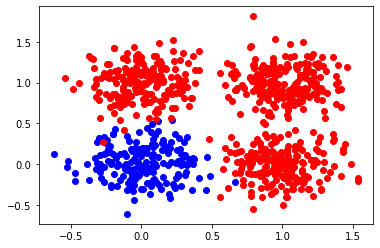

In [3]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(dataset)):
    if(dataset[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[dataset[i,0]])
        resultado_0y = np.append(resultado_0y,[dataset[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[dataset[i,0]])
        resultado_1y = np.append(resultado_1y, [dataset[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

plt.show()

Nessa etapa, iremos dividir a base de dados em um conjunto de treinamento (70%) e um conjunto de teste (30%).

In [4]:
#criando novo dataset aleatório
random.shuffle(dataset)

#pegando o percentual de cada tipo de entrada
n_training = int(0.7*(len(dataset)))

#particionando
training, test = dataset[:n_training,:], dataset[n_training:,:]

Definidos os conjuntos de treinamento e de teste, será dado início a criação das funções responsáveis pelo aprendizado do neurônio.

In [5]:
def iniciar_pesos(inicio,fim):
    pesos = np.array([random.uniform(inicio,fim),random.uniform(inicio,fim),random.uniform(inicio,fim)])
    return pesos

In [6]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

In [7]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0

In [8]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos + np.dot(mult,x)
    return result

In [9]:
def aprender(pesos):
    n = len(training)

    for i in range(0,n):
        soma_saida = soma(np.array([-1, training[i,0], training[i,1]]),pesos) 
        y = ativacao(soma_saida)
        
        if(y != training[i,2]):
            pesos = ajusta(pesos,training[i,2],y,np.array([-1, training[i,0], training[i,1]]))
    return pesos

In [10]:
pesos = iniciar_pesos(-0.5,0.5)

In [11]:
for i in range(0,100):
    resultado = aprender(pesos)
    pesos = resultado
    np.random.shuffle(training)
    print(training)
    

[[ 0.08097161  0.30854443  1.        ]
 [ 0.31024232 -0.13097232  1.        ]
 [-0.46833414 -0.10620722  1.        ]
 ...
 [-0.07825563 -0.08083512  1.        ]
 [ 0.46304142  0.09405471  1.        ]
 [-0.25504586  0.25995271  1.        ]]
[[-0.00714871  1.11139215  0.        ]
 [ 0.25843371 -0.12301855  1.        ]
 [ 0.19643799  0.20349331  1.        ]
 ...
 [ 0.28066172  0.13031361  1.        ]
 [-0.11163154  0.00851976  1.        ]
 [-0.1882854   0.85202358  0.        ]]
[[ 0.04253339  0.4469942   1.        ]
 [-0.1576937   0.74716362  0.        ]
 [ 0.2123362   0.02517371  1.        ]
 ...
 [ 0.20756958  0.56789279  0.        ]
 [-0.09424941  1.02660114  0.        ]
 [ 0.45659077 -0.31018866  1.        ]]
[[-0.0031101   0.18965456  1.        ]
 [ 0.40646314 -0.16905173  1.        ]
 [ 0.05481746  1.01844515  0.        ]
 ...
 [-0.22671361  0.21841371  1.        ]
 [-0.0547258  -0.11131214  1.        ]
 [-0.20009509  0.37511566  1.        ]]
[[-0.07849193  1.09714508  0.        ]
 

[[ 0.16775772  0.22831062  1.        ]
 [ 0.0114998  -0.05939114  1.        ]
 [-0.0054924  -0.30231266  1.        ]
 ...
 [-0.03486406  1.15509737  0.        ]
 [-0.46833414 -0.10620722  1.        ]
 [-0.11163154  0.00851976  1.        ]]
[[-0.18071949  0.99659993  0.        ]
 [ 0.05369039  1.11695178  0.        ]
 [-0.33000132  0.07234854  1.        ]
 ...
 [ 0.21312794  0.95303668  0.        ]
 [ 0.07028775  0.39056305  1.        ]
 [ 0.32202822  0.9463054   0.        ]]
[[-0.08482233  0.99780252  0.        ]
 [ 0.07337792 -0.05966064  1.        ]
 [-0.09424941  1.02660114  0.        ]
 ...
 [ 0.22481021  1.51639247  0.        ]
 [-0.54561769  1.05326691  0.        ]
 [-0.06954984  0.74082022  0.        ]]
[[-0.29322959 -0.09065359  1.        ]
 [-0.48420554  0.9196465   0.        ]
 [ 0.46304142  0.09405471  1.        ]
 ...
 [-0.0020931   1.31761231  0.        ]
 [-0.00474636  0.09826743  1.        ]
 [ 0.10964344  0.67482285  0.        ]]
[[-0.32030378 -0.05453506  1.        ]
 

[[1]
 [2]
 [3]
 [1]
 [2]]
[[1]
 [2]
 [3]
 [3]
 [2]]
[[1]
 [1]
 [3]
 [2]
 [2]]
[[1]
 [1]
 [1]
 [2]
 [2]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [